Dongjun Cho, Programming Assignment 1, Algorithms 605.621

# Statement of Academic Integrity

Put a personal statement of academic integrity here.  Failure to do so will result in a deduction of points.

I, Dongjun Cho, attempted to answer each question honestly and to the best of my abilities. I cited any and all help that I received in completing this assignment. 

# Overview

Implement an algorithm and an improvement to return the closest pair of points in a Euclidean two-dimensional plane.  The algorithm shall be a simple approach that runs in $\theta(n^2)$ time, and the improvement shall be some tweak or method for improving the runtime.

## Tasks
Specifically, you must:

1. Write a simple algorithm, in correct pseudocode notation, and suggest some improvements.  The algorithm portion will be submitted as part of a homework assignment.
1. Implement both algorithms correctly, in this notebook. 
1. Compare/contrast algorithm performance via graphs.  In this one case, the performance is related to the number of calls of the distance method.
1. Discuss your experiences and opportunities to improve.

## Requirements
The implementation is not collaborative.  While writing the algorithm may be a collaborative effort as indicated in one of the homework assignments, you must write your own code following the Programming Assignment Guidelines (Blackboard page Syllabus & Course Information ).  Pay careful attention to the academic integrity requirements regarding publicly available code.

Regarding the improvement, you *could* use an asymptotically efficient algorithm such as the one sketched in CLRS section 33.4.  We will be very impressed if you push yourself to try this - it isn't hard, but it's probably above most folks who are new to programming.  However, since this is the first assignment, and many may be trying Python for the first time, we will settle for incremental improvement techniques that do not change the fundamental asymptotic behavior.

On your implementation, use the function signatures and any data structures as supplied$-$do not change function signatures or introduce strange calling conventions; the instructor's tests are written to the function signatures.  Be sure to "restart and run all" prior to submitting your notebook, as the instructor will do the same when testing.  Points will be deducted if the instructor has to make any changes in order to run your code.

The analysis and graphs must be driven with programmatically derived data, not "hard coded" or pasted in run counts.  An example of what **not** to do: xvals=[3, 4, 12, 15, 36, 47] /* hard coded */  Instead, xvals = [i for i in mycounts] where mycounts is an array you update in your function.

As for notebook runtimes, the notebook must never exceed an execution time of FIVE WALL-CLOCK MINUTES.  If your notebook does not execute on a cloud service, such as Google Colaboratory, on the supplied instructor inputs within this time, points will be deducted.  It likely means there's a bug in your implementation.  If you have issues with this, reach out to your instructor.

# Closest Pairs (100 pts total)
The algorithm has separate points assessed within a homework assignment.


## Implementation (50 pts)
Implement your algorithm in the Student Implementation block(s) and code to print your results. Your code must have a reasonable, consistent, style and commented documentation. It must have appropriate data structures and modularity.  Feel free to use all of the block, and to create additional notebook cells as necessary.  Just put all your code between the instructor data structures and instructor run blocks.  Be sure to preserve the instructor input block, and do not change names of any of the variables - they will be inputted fresh by the instructor when testing your code.  Output must be clear and nicely formatted.  

Your code should have be robust and have some error checking - we won't deliberately test for unusual/nonsense conditions, but our tests will include different data than supplied here so you want to be prepared for a variety of (well-formed) input conditions.

**Note - you must implement your algorithm** that you submitted earlier, allowing for minor corrections.

Print the closest pair of points, and their distance.

### Instructor Data Structures

In [1]:
############################################################################
# INSTRUCTOR DATA STRUCTURES AND INITIAL TEST DATA
# DO NOT CHANGE THE NAMES OR SIGNATURES OF THESE STRUCTURES OR FUNCTIONS.
############################################################################
class Point(object):
    """Data structure for points, methods include P.x, P.y and other Pythonisms
  necessary to use with sets, tuples, etc."""
    def __init__(self, x, y): 
        self.x = x 
        self.y = y
    def __repr__(self):
        return f"({self.x},{self.y})" 
    def __eq__(self, other): # need both eq and hash if you want to use sets
        return self.x == other.x and self.y == other.y
    def __hash__(self):
        return hash((self.x, self.y))
    def __iter__(self): # required to convert to tuple
        for i in [self.x, self.y]:
          yield i

# Initial set of test points (w/answers)
POINTS = [Point(7, 16), Point(13, 5), Point(4, 2), Point(20, 8), Point(5, 16), 
          Point(2, 4), Point(6, 6), Point(20, 15), Point(17, 8), Point(11, 16)]
# Expected output:
# Closest pair of points are (7,16) and (5,16), distance = 2.0

### Call Counter

In [2]:
def call_counter(f):
    def wrapped(*args, **kwargs): # deal with any/all arguments
        wrapped.calls += 1
        return f(*args, **kwargs)
    wrapped.calls = 0
    return wrapped

### Student Implementation

In [3]:
############################################################################
# STUDENT IMPLEMENTATION BLOCK - Simple
############################################################################
# Student Euclidean Distance Function
from math import * #For square function

@call_counter
def dist(p1, p2):
    # stub implementation - you have to change - just here to demo return vals
    #d = p1.x - p2.y # clearly incorrect - you fix it
    
    #Euclidean distance formula = square root((xi - xj)^2 + (yi - yj)^2)
    return sqrt((p1.x - p2.x)**2 + (p1.y-p2.y)**2)

# Definition of Student Closest Points function
def closestPairSimple(points):  # Preserve the function name and arguments
    """This is the simple n^2 implementation."""
    # I WILL WRITE MY CODE HERE
    # I MAY USE OTHER CELLS, functions, but beware that they must be in order - 
    # "Restart and Run All" before submission to make sure you didn't put 
    # some function you need down below this block.
#     mypoint1, mypoint2 = POINTS[0], POINTS[1]
#     mydist = dist(mypoint1, mypoint2)
    # Remember to track the calls to dist
    distance_list = []
    mydist = -1 # set to -1
    for i in range(0, len(points)-1): #first item
        for j in range(i+1, len(points)): #second item
            p1, p2 = points[i], points[j]
            current_distance = dist(p1, p2) # Compute the distance
            if mydist == -1 or mydist > current_distance: #Find minimum distance
                mydist = current_distance
                mypoint1, mypoint2 = points[i], points[j]
    # Return the closest 2 points, and the Euclidean distance between them.
    return mypoint1, mypoint2, round(mydist,2)

############################################################################
# STUDENT IMPLEMENTATION BLOCK - Improved
###########################################################################
#Find minimum distance
def min_dist(a, b) :
    if a < b :     # a < b
        return a  # a
    else :        # b < a 
        return b  # b 

def d_min(points) :
    n = len(points)
    
    # If n is less than equal to 3, I manually calculate the distance instead of returning brute force,
    # By comparing execution steps, manual check is faster than returning brute force.
    
    if n<=3: #If n is less than equal to 3
        if n==3: # If n is equal to 3
            a = dist(points[0], points[1]) #calculate the distance of point0, point1
            b = dist(points[0], points[2]) #calculate the distance of point0, point2
            c = dist(points[1], points[2]) #calculate the distance of point1, point2
            minDist = min_dist(a, b) #check the minimum distance between a, b
            minDist =min_dist(minDist, c) #check the minimum distance between minDist, c
            if minDist == a: #if the minimum distance is a
                return points[0], points[1], a
            if minDist == b:#if the minimum distance is b
                return points[0], points[2], b
            if minDist == c: #if the minimum distance is c
                return points[1], points[2] , c
        if n==2: # If n is equal to 2
            return points[0], points[1], dist(points[0], points[1])
    else: #If n is greater than 3
        mid = n//2
        # Divide the points array by center x-coordinate
        left_p1, left_p2=d_min(points[:mid])[0], d_min(points[:mid])[1] # Left side of the pair points
        Left_point_distance = dist(left_p1, left_p2) # Left side of distance of pair points
        right_p1, right_p2 = d_min(points[mid:])[0],d_min(points[mid:])[1] #Right side of pair points
        Right_point_distance = dist(right_p1, right_p2) #Right side of distance of pair points
        #Compare left side and right side
        if Left_point_distance < Right_point_distance: #if left side distance is less than right side distance
            d = Left_point_distance
            pair_point = (left_p1, left_p2)
        else:#if right side distance is less than left side distance
            d = Right_point_distance
            pair_point = (right_p1, right_p2)
        candidate = [points[mid]] # Candidate points that could be the minimum distance.
        i = 1
        #Candidates include only points whose x-coordinates are less than the minimum distance relative to the boundary line.
        while(mid+i<n):# Check the right side of the points
            dist_gap_1 = points[mid+i].x - points[mid].x
            if (abs(dist_gap_1)) <= d: #Only points that are shorter than the minimum distance d are candidates.
                candidate.append(points[mid+i])
                i += 1#Increment i to check all the right side of the points
            else:
                break
        i = 1
        while(mid-i>=0):# Check the left side of the points
            dist_gap_2=points[mid].x - points[mid-i].x
            if (abs(dist_gap_2)) <= d:#Only points that are shorter than the minimum distance d are candidates.
                candidate.append(points[mid-i])
                i += 1#Increment i to check all the left side of the points
            else:   
                break
        candidate = sorted(candidate, key = lambda x : x.y) # Sort by y-coordinate
        closest_distance = d #set closest_distance as d
        for i in range(0, len(candidate)-1) : 
            for j in range(i+1,len(candidate)) : 
                y_distance = candidate[i].y - candidate[j].y # Calculate the distance between points by y_coordinates
                candidate_distanced = dist(candidate[i],candidate[j]) #Calculate the candidate distance
                if (abs(y_distance)) < closest_distance :  # # Only points that is less than closest_distance by y-coordinate
                    if(candidate_distanced < closest_distance): #If the candidate distance is less than closest distance
                        closest_distance = candidate_distanced # candidate distance becomes minimum distance
                        point1, point2 = candidate[i], candidate[j] #Take the closest point pair
                    else:
                        break
        if closest_distance < d: #If the closest distance is less than d
            return point1, point2, closest_distance # then print the results
        else:#If the closest distance is bigger than d
            return pair_point[0], pair_point[1], d #print the results.

def closestPairImproved(points):
    """This is the improved implementation."""
    points =sorted(points , key = lambda x : x.x) #Sort array by x-coordinate before we calcualte the closest pair of point distance
    mypoint1 = d_min(points)[0] #First points of pair points
    mypoint2 = d_min(points)[1] #Second points of pair poitns
    mydist = d_min(points)[2]   #Shortest distance of points
    return mypoint1, mypoint2, round(mydist,2)

### Student Output


In [4]:
############################################################################
# STUDENT OUTPUT BLOCK
############################################################################
# This block should run your function and produce output that matches the input 
# and output.

# Print results here - for both simple and improved versions
# Example of the first:
p1, p2, d = closestPairSimple(POINTS)
print(f"Simple: Closest pair of points are {p1} and {p2}, distance = {d}")
# closestPairSimple output
# Closest pair of points are (7,16) and (5,16), distance = 2.0

p1, p2, d  = closestPairImproved(POINTS)
print(f"Improved: Closest pair of points are {p1} and {p2}, distance = {d}")

Simple: Closest pair of points are (7,16) and (5,16), distance = 2.0
Improved: Closest pair of points are (5,16) and (7,16), distance = 2.0


## Analysis (40 pts)
 Perform tests to measure the asymptotic behavior of your program 
(call this the code's worst-case running time).  As with every programming assignment this semester, *running time* implies execution steps, not clock time, versus size of the input data.  Modify your code (either here or above) to count the steps, run trials of different lengths, and plot using the graph below.  (You may use this graph code for future assignments, or you can put in your own, as long as it is reasonable.)

Think: what goes on the x axis?  What goes on the y axis?  How do you modify your code above to exercise the different inputs?  Label the axes, use the right data, make this look *professional.*  Also, pay attention to the asymptotic bounds.  Compare simple to improved on the same graph.

***Then, write a description below the figure of what is happening.***

Please note, graphs must tell a story.  The better your graph is, the more descriptive, (appropriate scale to "zoom in" on the required features), the better the story it tells.  Use colors, points, symbols, a good key, good labels, make this look professional.  If you are comparing two alternatives, find a way to overlay their runs on a single graph.  Really, really try to sell me graphically on your improvements.

Things to consider:
* How many points do you plot?  Notice there are too many red x's.
* Which bounding functions do you include?  Not all of them.  Can you "bring them in a little" to make them tighter to your function?

You may reuse this plot style on future assignments, or augment it as you wish.  Tell us a good story!  **Don't forget the writeup.**



### Plot

In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/dongjun819/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dongjun819/.local/lib/python3.6/site-packages/m

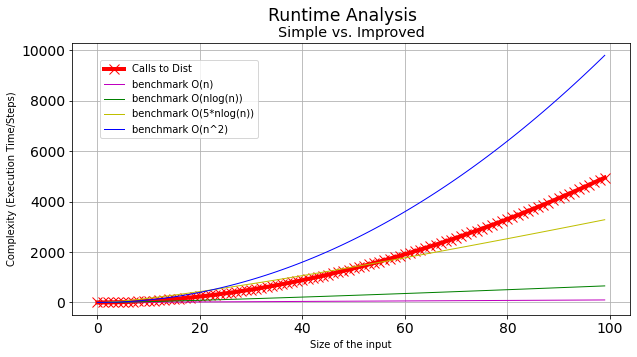

In [5]:
# Code adapted from Sahil Sharma, used with permission, from Spring, 2021

from math import pow
from math import log2
from math import factorial

# Let myruncounts[i] be count of calls for POINT array of size i
myruncounts = [0.8*x**1.9 for x in range(100)] # your data here

# benchmark data set generation
yTestVals1 = [0,] # linear for O(n)
yTestVals2 = [0,] # quadratic for O(n^2)
yTestVals3 = [0,] # n*log(n) for O(nlog(n))
yTestVals4 = [0,] # 5*n*log(n) for O(nlog(n))

# generate bench mark data for O(n), O(n^2), O(nlog(n)), O(10*nlog(n)), and O(n!)
for i in range(1, len(myruncounts)):
    yTestVals1.append(i)
    yTestVals2.append(pow(i, 2))
    yTestVals3.append(i*log2(i))
    yTestVals4.append(5*i*log2(i))

# %matplotlib inline
import matplotlib.pyplot as plt

# Simple vs. Improved execution steps
plt.rcParams['figure.figsize'] = [10,5]
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Runtime Analysis', size="xx-large")

# plotting nearest neighbor execution steps
ax1.set_title('Simple vs. Improved', size="x-large")
ax1.plot(range(len(myruncounts)), myruncounts, "rx-", markersize=10, linewidth=4, label="Calls to Dist")
ax1.plot(range(len(myruncounts)), yTestVals1, "m^-", markersize=0, linewidth=1, label="benchmark O(n)")
ax1.plot(range(len(myruncounts)), yTestVals3, "g^-", markersize=0, linewidth=1, label="benchmark O(nlog(n))")
ax1.plot(range(len(myruncounts)), yTestVals4, "y^-", markersize=0, linewidth=1, label="benchmark O(5*nlog(n))")
ax1.plot(range(len(myruncounts)), yTestVals2, "b^-", markersize=0, linewidth=1, label="benchmark O(n^2)")
ax1.grid(b=True, which='major', axis='both')
## X label for this graph is Complexity respect to input size in other words, Runtime. 
## Y label for this graph is input size. 
ax1.set(xlabel = 'Size of the input', ylabel = 'Complexity (Execution Time/Steps)')
ax1.legend(loc=(0.05,0.65), scatterpoints=1)
ax1.tick_params(axis="both", which="major", labelsize=14)

### Plot: Execution Steps
I generated random points that have range from 0 to 100 for both x and y coordinates. I was able to track the execution steps by counting distance function calls.

In [6]:
import random 

def simple_counter_calls(n):
    simple_random_point_gen =[]
    #Generate random points
    simple_random_point_gen.append([Point(random.randrange(100),random.randrange(100)) for x in range(n)]) 
    closestPairSimple(simple_random_point_gen[0])
    #Count the simple algorithm
    simple_calls = dist.calls
    closestPairImproved(simple_random_point_gen[0])
    #Count the improved algorithm
    improved_calls = dist.calls- simple_calls
    return simple_calls, improved_calls

In [7]:
simple_count =[]
# Append 100 element of points for simple and improved
input_size = 100
for i in range(2, input_size):
    simple_count.append(simple_counter_calls(i))
closest_simple =[]
closest_improved =[]
# In order to measure individual counter calls, it has to subtract element to previous element
for j in range(1, len(simple_count)):
    count_size = simple_count[j][0] - simple_count[j-1][0]
    closest_improved.append(simple_count[j][1])
    closest_simple.append(count_size)

[Text(0.5, 0, 'Input Size'), Text(0, 0.5, 'Execution Steps')]

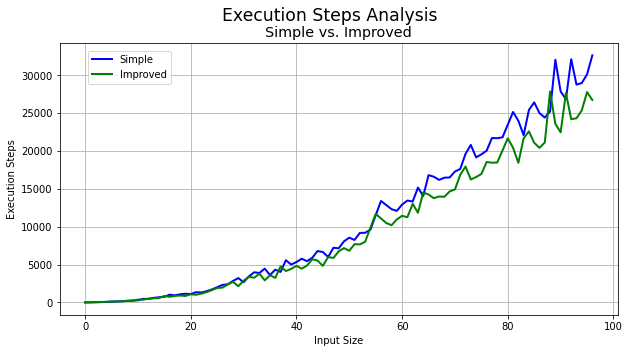

In [8]:
plt.rcParams['figure.figsize'] = [10,5]
fig, (ax1) = plt.subplots(1, 1)
fig.suptitle('Execution Steps Analysis', size="xx-large")
ax1.set_title('Simple vs. Improved', size="x-large")

ax1.plot(range(len(closest_simple)), closest_simple, "b^-", markersize=0, linewidth=2, label="Simple")
ax1.plot(range(len(closest_improved)), closest_improved, "g^-", markersize=0, linewidth=2, label="Improved")
ax1.grid(b=True, which='major', axis='both')
ax1.legend(loc=(0.05,0.85), scatterpoints=1)
ax1.set(xlabel = 'Input Size', ylabel = 'Execution Steps')

### Analysis Writeup

***I WILL WRITE MY DESCRIPTION HERE OF WHAT IS HAPPENING REGARDING THE FIGURE ABOVE.  I WILL COMPARE IT TO MY ASYMPTOTIC NOTATION THAT I STATED EARLIER.***

In Runtime Analysis graph figure, the x-axis represents the size of the inputs. Currently, it has 100 size of the inputs. The y-axis represents the complexity or execution steps. Based on this figure, we can say O(n^2) > Dist > O(5*nlog(n)) > O (nlog(n)) > O(n). O(n) takes shortest steps and O(n^2) takes longest steps. 

To generate this Execution Steps Analysis graph, I generated random points that have a range from 0 to 100 for both x and y coordinates. To count the execution steps, I count the number of calls of the distance methods. By counting the number of calls of the distance methods, I was able to analyze the performance of both simple algorithm and the improved algorithm. 

Simple Algorithm is using a brute-force algorithm that checks all the possible cases to generate the closest points. Since it checks all the possible cases, it should theoretically have $\theta(n^2)$ complexity time. When I analyze the Execution Step analysis graph, the simple algorithm gives $\theta(n^2)$ complexity time.

For the improved algorithm, I tried to use the divide-and-conquer algorithm. In an improved algorithm, it first divides the points from the left side to the right side. Secondly, it finds the minimum distance for each side. Last, it conquers by comparing the minimum distance of each side. Since the improved algorithm tried to use the divide-and-conquer algorithm, it should theoretically have $\theta(nlog(n))$ complexity time.  However, when I analyze the Execution Step analysis graph, the improved algorithm gives the time complexity little of $\theta(n^2)$. 

Even though the improved algorithm doesn't give $\theta(nlog(n))$ time complexity by analyzing the execution steps graph, the improved algorithm takes shorter execution steps than the simple algorithm.

## Retrospection (10 total)
Talk about how you did on this assignment.  This is just feedback to the instructor.  You can edit this cell and answer inline in non-bold.
* **What was the last bug you found and fixed?**\
The first bug that I spent most time fixing is a logic error. I was able to calculate the minimum distance, but I couldn't figure out how to print the closest pair of points and distance. I fixed this error by changing the way to find the minimum distance. For minimum distance, I used to use the python built-in min function. But, I fixed this error by using if-statement to extract the closest pair of points. The second bug that I found is Object error. When I tried to check single x_coordinate points, I kept getting a"'Point' object is not subscriptable" error. I fixed this error by changing the list to object. The last bug that I found is a logic error. If I use the default Points that Professor provided, it works fine. However, If I tried different points, it gets a logic error. I fixed this logic error by checking the left side of the point and the right side of the points. 
* **What are some late-breaking ideas you had for improving your implementation, that maybe you didn't have time to implement?**\
It would be much better if I can construct the faster algorithm with the $\theta(nlog(n))$ time complexity. Also, It would be much better to check every possible edge case. For example, If a bunch of points on the dividing line, I think it would be better to check middle points. 
* **What did you feel you learned from this assignment?** \
From this assignment, I learned how to count the execution steps. Also, I understand the difference between execution steps and clock time. By debugging this algorithm, I learned how to improve the performance of the algorithm. I understand that improving the algorithm would help my future coding. 
* **How would you improve this assignment for future semesters?**\
I would improve this assignment for the future semester by fully plan how to structure the algorithm before coding. 

If there's anything else you'd like to say, feel free to write it.


# Citations
Include citations for any and all help you received.

To structure the improved algorithm (divide-and-conquer), I used this <a href="https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/closepoints.pdf">reference</a>. \
To understand the complexity and understand how to plot, I used this <a href="https://blog.finxter.com/complexity-of-python-operations/">reference</a>. 

# Instructor Test Data
This is where the instructor will paste the test code and possibly additional data.  Some data with results are provided to help you debug, but we may test with different data.  Ensure your function works in this block.

In [9]:
# INSTRUCTOR-PROVIDED TEST DATA
# Ensure that your code matches both the input signature and the expected output
# For grading, different test data will be pasted into the input cell and your code cells will be executed
# Be sure that your input and output signatures match the provided sample data
# You should also generate your own test data to fully explore the behavior of your code

# Test #1
POINTS = [(7, 16), (13, 5), (4, 2), (20, 8), (5, 16), (2, 4), (6, 6), (20, 15), (17, 8), (11, 16)]
M = 1  # Number of closest points to return
# Expected output:
# Points (7, 16) and (5, 16), distance = 2.0

#Test #2
POINTS = [(7, 16), (13, 5), (4, 2), (20, 8), (5, 16), (2, 4), (6, 6), (20, 15), (17, 8), (11, 16)]
M = 10  
# Expected output:
# The closest points are: 
# Points (7, 16) and (5, 16), distance = 2.0

# Test #3
POINTS = [(6, 6), (4, 7), (17, 3), (6, 18), (2, 13), (12, 5), (5, 10), (18, 16), (2, 20), (13, 1)]
M = 5
# Expected output:
# The closest points are: 
# Points (6, 6) and (4, 7), distance = 2.24 # Note the rounding / formatting - make it pretty


In [10]:
#Test #3
POINTS_test_3 = [Point(6, 6),Point(4, 7), Point(17, 3), Point(6, 18), Point(2, 13), Point(12, 5), Point(5, 10), Point(18, 16), Point(2, 20), Point(13, 1)]

print("closestPairSimple " + str(closestPairSimple(POINTS_test_3)))
print("closestPairImproved " + str(closestPairImproved(POINTS_test_3)))

closestPairSimple ((6,6), (4,7), 2.24)
closestPairImproved ((4,7), (6,6), 2.24)


### Trace Runs/ Test Runs

To test this algorithm, I made the function that generates random point and prints the result of the simple and improved algorithm.

In [11]:
def trace_runs(n):
    simple_random_point_gen =[]
    simple_random_point_gen.append([Point(random.randrange(n),random.randrange(n)) for x in range(n)]) 
    print("Simple algorithm" + str(closestPairSimple(simple_random_point_gen[0])))
    print("Improved algorithm" + str(closestPairImproved(simple_random_point_gen[0])))

In [12]:
n = [100, 500, 1000] #number of points
for i in range(0, len(n)):
    print("When n is equal to " + str(n[i]))
    trace_runs(n[i])

When n is equal to 100
Simple algorithm((83,71), (83,71), 0.0)
Improved algorithm((83,71), (83,71), 0.0)
When n is equal to 500
Simple algorithm((364,59), (364,58), 1.0)
Improved algorithm((460,405), (459,405), 1.0)
When n is equal to 1000
Simple algorithm((598,214), (598,214), 0.0)
Improved algorithm((654,670), (654,670), 0.0)
